In [1]:
import pandas as pd
import numpy as np

#Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns #correlation
import pydotplus
from IPython.display import Image

#Library for building machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
df = pd.read_csv("employee_churn.csv", sep=',', header=0)

In [3]:
df=df[df['department'] != 'temp']
df = pd.get_dummies(df, columns=["department"])
df[["filed_complaint", "recently_promoted", "last_evaluation"]] = df[["filed_complaint", "recently_promoted", "last_evaluation"]].fillna(0)
mapping = {'low':1, 'medium': 2, 'high': 3}
mapping_2 = {'Employed':1, 'Left':0}
df['salary']=df['salary'].replace(mapping)
df['status']=df['status'].replace(mapping_2)
print(df)
nan_counts = df.isna().sum()
print(nan_counts)

       avg_monthly_hrs  filed_complaint  last_evaluation  n_projects  \
0                  221              0.0         0.932868           4   
1                  232              0.0         0.000000           3   
2                  184              0.0         0.788830           3   
3                  206              0.0         0.575688           4   
4                  249              0.0         0.845217           3   
...                ...              ...              ...         ...   
14244              178              0.0         0.735865           5   
14245              257              0.0         0.638604           3   
14246              232              1.0         0.847623           5   
14247              130              0.0         0.757184           4   
14248              159              0.0         0.578742           3   

       recently_promoted  salary  satisfaction  status  tenure  department_IT  \
0                    0.0       1      0.829896       0

In [4]:
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,department_IT,department_admin,department_engineering,department_finance,department_information_technology,department_management,department_marketing,department_procurement,department_product,department_sales,department_support
count,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000
mean,201.083736,0.143944,0.649479,3.801038,0.021325,1.592764,0.621295,0.760662,3.497228,0.082528,0.012511,0.184248,0.051749,0.014856,0.042295,0.058217,0.012368,0.061132,0.278860,0.150839
std,49.959962,0.351045,0.268123,1.236058,0.144470,0.635435,0.250469,0.426694,1.460917,0.275177,0.111153,0.387700,0.221527,0.120982,0.201268,0.234162,0.110528,0.239580,0.448454,0.357904
min,96.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.040058,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,156.000000,0.000000,0.525727,3.000000,0.000000,1.000000,0.450390,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,200.000000,0.000000,0.688023,4.000000,0.000000,2.000000,0.652527,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,245.000000,0.000000,0.858129,5.000000,0.000000,2.000000,0.824951,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,310.000000,1.000000,1.000000,7.000000,1.000000,3.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


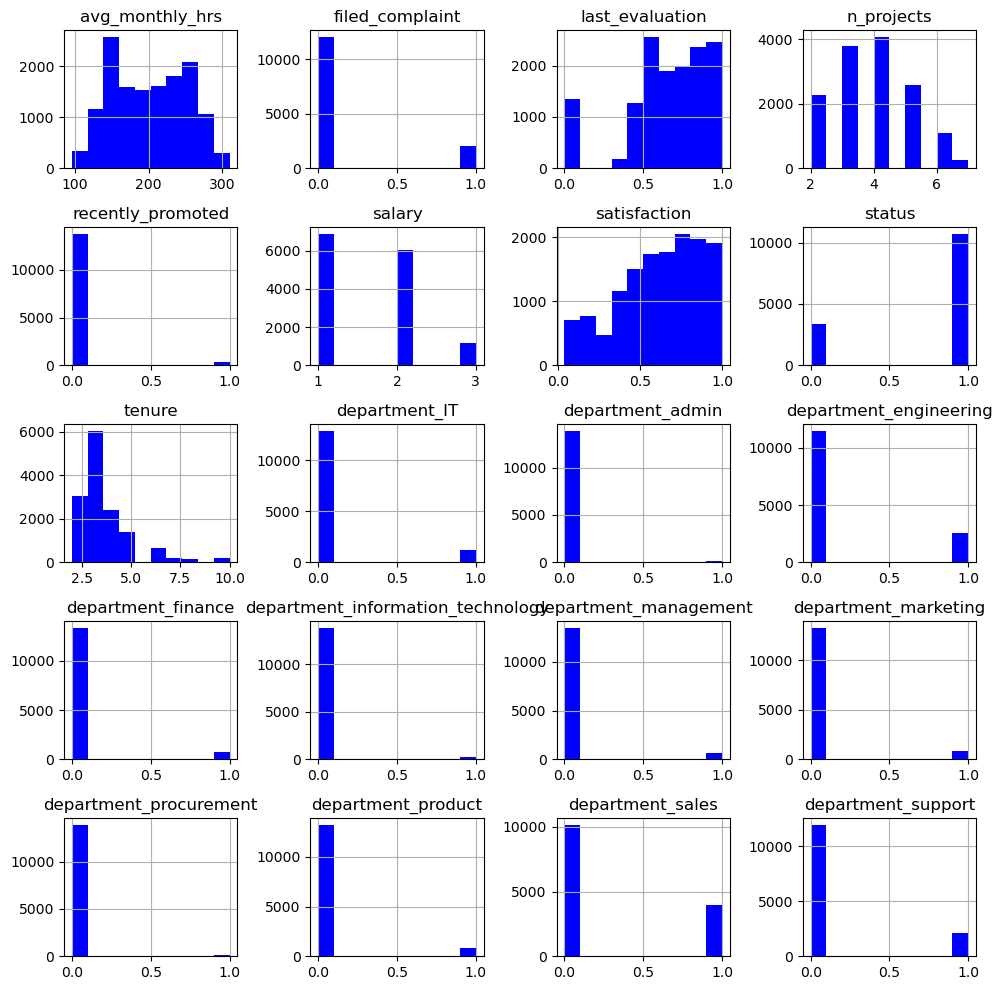

In [5]:
df.hist(figsize=(10,10), color="blue")
plt.tight_layout()

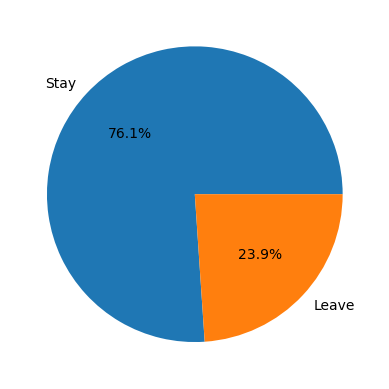

In [6]:
class_counts = df["status"].value_counts()
class_counts
plt.pie(class_counts, labels=["Stay", "Leave"], autopct="%1.1f%%");

In [ ]:

lr_sfs.fit(X_train_sfs, y_train)

lr_sfs2.fit(X_ts, y_train)

lr_sfs3.fit(X_ts2, y_train)


LogisticRegression(max_iter=10000, penalty=None, random_state=1234)

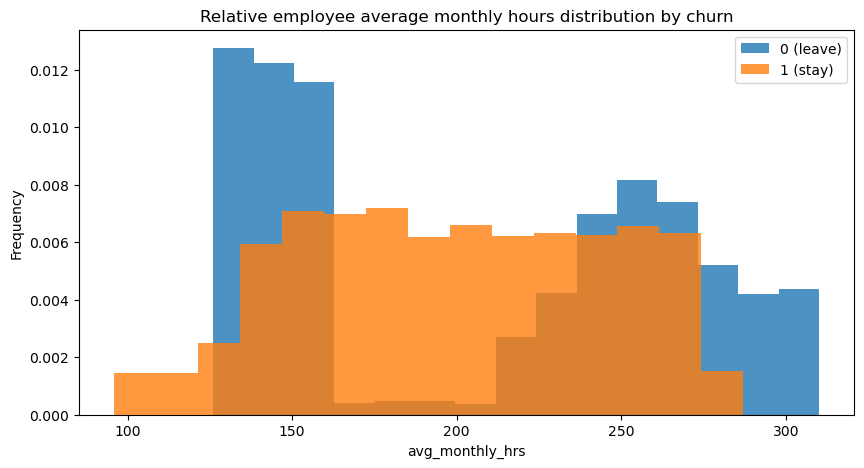

In [37]:
ax = df['avg_monthly_hrs'].loc[df['status'] == 0].plot.hist(bins=15, density = True, alpha=0.8, label='0 (leave)', figsize = (10,5))
ax = df['avg_monthly_hrs'].loc[df['status'] == 1].plot.hist(bins=15, density = True, alpha=0.8, label='1 (stay)', figsize = (10,5))
ax.set_xlabel('avg_monthly_hrs')
ax.set_title('Relative employee average monthly hours distribution by churn')
ax.legend()

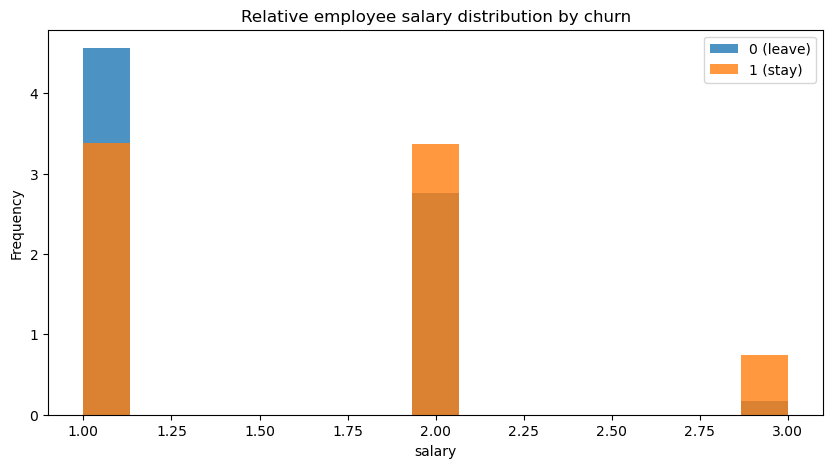

In [38]:
ax = df['salary'].loc[df['status'] == 0].plot.hist(bins=15, density = True, alpha=0.8, label='0 (leave)', figsize = (10,5))
ax = df['salary'].loc[df['status'] == 1].plot.hist(bins=15, density = True, alpha=0.8, label='1 (stay)', figsize = (10,5))
ax.set_xlabel('salary')
ax.set_title('Relative employee salary distribution by churn')
ax.legend()

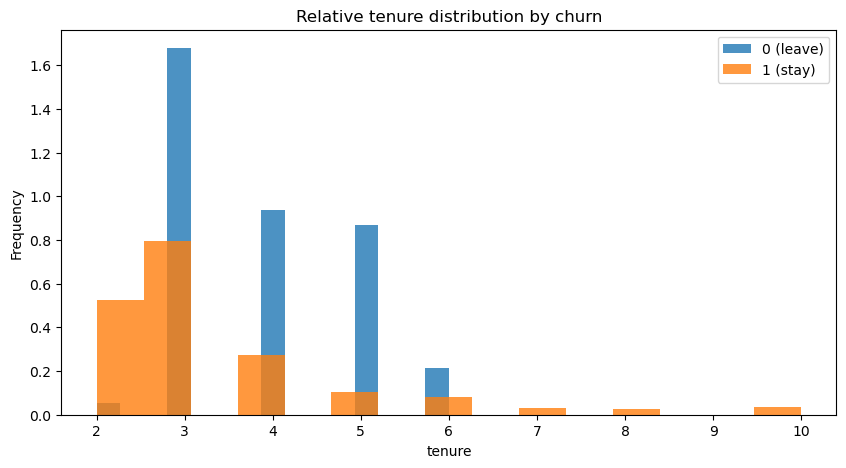

In [39]:
ax = df['tenure'].loc[df['status'] == 0].plot.hist(bins=15, density = True, alpha=0.8, label='0 (leave)', figsize = (10,5))
ax = df['tenure'].loc[df['status'] == 1].plot.hist(bins=15, density = True, alpha=0.8, label='1 (stay)', figsize = (10,5))
ax.set_xlabel('tenure')
ax.set_title('Relative tenure distribution by churn')
ax.legend()

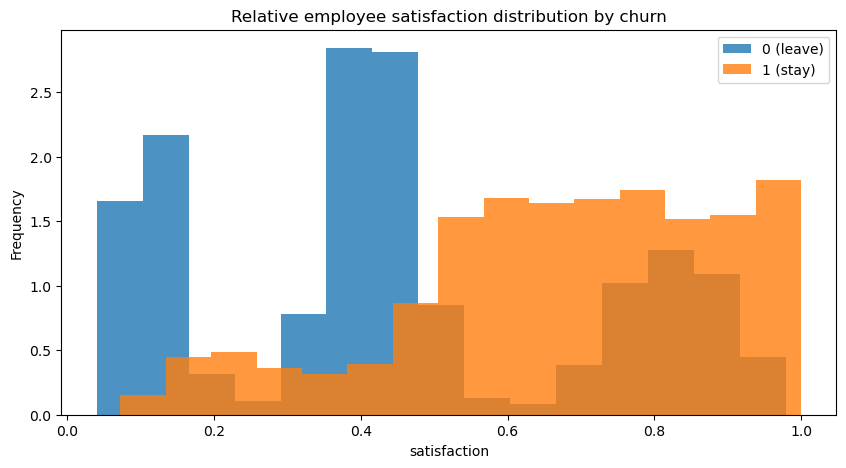

In [40]:
ax = df['satisfaction'].loc[df['status'] == 0].plot.hist(bins=15, density = True, alpha=0.8, label='0 (leave)', figsize = (10,5))
ax = df['satisfaction'].loc[df['status'] == 1].plot.hist(bins=15, density = True, alpha=0.8, label='1 (stay)', figsize = (10,5))
ax.set_xlabel('satisfaction')
ax.set_title('Relative employee satisfaction distribution by churn')
ax.legend()

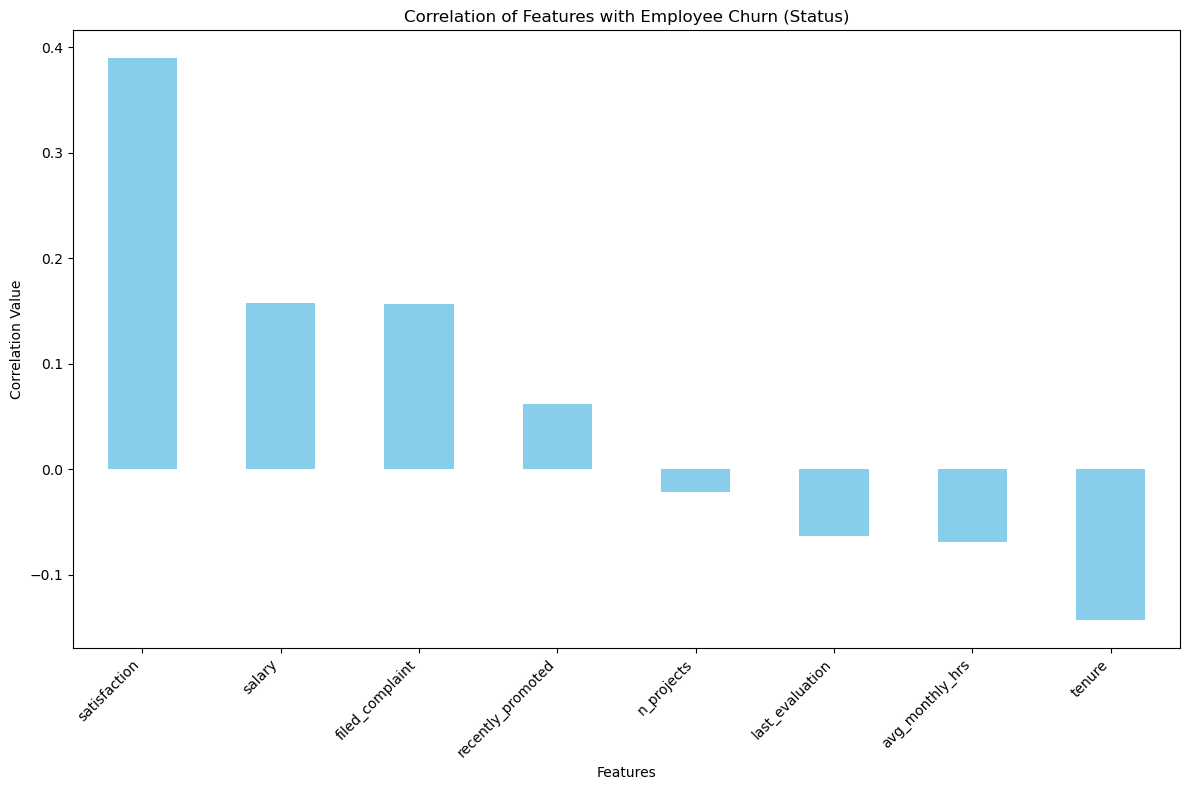

In [129]:
columns_to_drop = [
    'department_sales', 'department_admin', 'department_engineering',
    'department_finance', 'department_information_technology',
    'department_management', 'department_marketing', 'department_procurement',
    'department_product', 'department_sales', 'department_support', 'department_IT'
]

df1 = df.drop(columns=columns_to_drop)

df1 = df.drop(columns=columns_to_drop)
correlation = df1.corr()['status'].drop('status')
sorted_correlation = correlation.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sorted_correlation.plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with Employee Churn (Status)')
plt.ylabel('Correlation Value')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("correlation_chart.png", format='png', dpi=300)
plt.show()


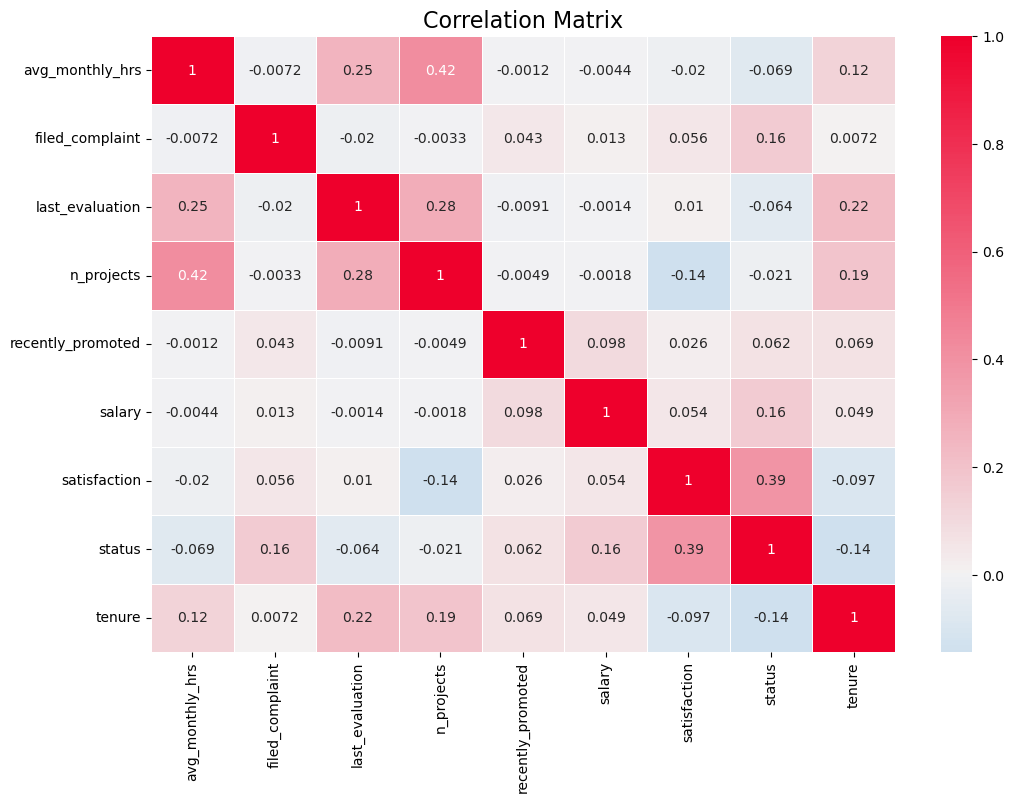

In [130]:
# Correlation Matrix
correlation_matrix = df1.corr()

# Create a custom colormap centered around 'skyblue'
cmap = sns.diverging_palette(250, 10, as_cmap=True, s=100, l=50)

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, linewidths=0.5, center=0)
plt.title('Correlation Matrix', fontsize=16)

# Save the plot as a .png file
plt.savefig("correlation_matrix.png", format='png', dpi=300)

# Display the plot
plt.show()

In [8]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [84]:
X = df.drop(["status"], axis=1)
y = df["status"]

In [85]:
X.shape

(14068, 19)

In [86]:
y.shape

(14068,)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234, test_size=0.3)

In [88]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler_2 = MinMaxScaler()





In [89]:
lr_sfs = LogisticRegression(penalty=None, max_iter=10000, random_state=1234)
lr_sfs2 = LogisticRegression(penalty=None, max_iter=10000, random_state=1234)
lr_sfs3 = LogisticRegression(penalty=None, max_iter=10000, random_state=1234)

sfs1 = SFS(
    lr_sfs,
    k_features=(1, X_train.shape[1]),
    forward=True,
    scoring="accuracy",
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [90]:
sfs1.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  19 | elapsed:    2.1s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    2.1s finished
Features: 1/19[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.0s finished
Features: 2/19[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  17 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.0s finished
Features: 3/19[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.0s finished
Features: 4/19[Parallel(n_jobs=-1)]: Using

SequentialFeatureSelector(estimator=LogisticRegression(max_iter=10000,
                                                       penalty=None,
                                                       random_state=1234),
                          k_features=(1, 19), n_jobs=-1, scoring='accuracy',
                          verbose=1)

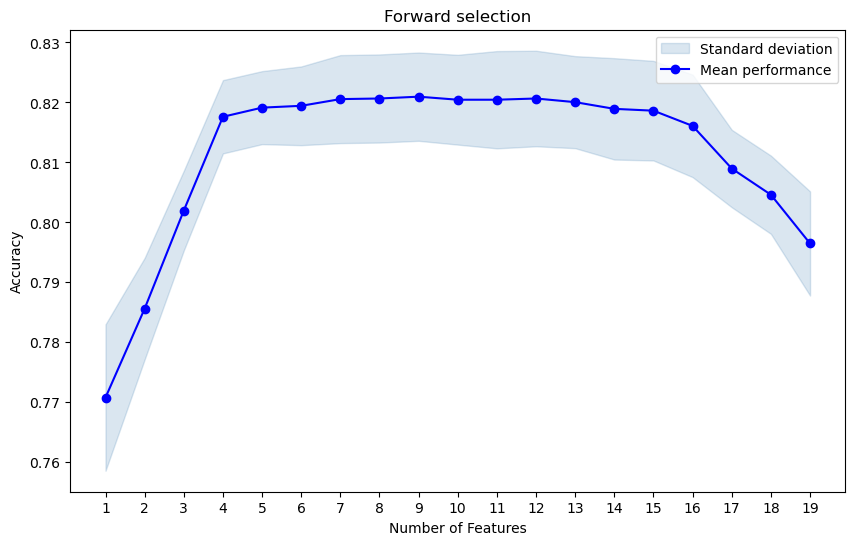

In [91]:
plot_sfs(sfs1.get_metric_dict(), ylabel="Accuracy", figsize=(10,6))
plt.title("Forward selection")
plt.legend(["Standard deviation", "Mean performance"])

In [92]:
sfs1.k_feature_names_
pd.DataFrame(sfs1.get_metric_dict())
sfs1.k_score_

0.8209616569517884

In [93]:
features = []
for item in sfs1.k_feature_names_:
    if item.startswith('department'):
        pass
    else:
        features.append(item)
    
print(features)

['filed_complaint', 'n_projects', 'recently_promoted', 'salary', 'satisfaction']


In [94]:
X_train_sfs = X_train[features]
X_test_sfs = X_test[features]

X_ts = scaler.fit_transform(X_train_sfs)
X_tst = scaler.transform(X_test_sfs)

X_ts2 = scaler_2.fit_transform(X_train_sfs)
X_tst2 = scaler_2.transform(X_test_sfs)

In [95]:

lr_sfs.fit(X_train_sfs, y_train)

lr_sfs2.fit(X_ts, y_train)

lr_sfs3.fit(X_ts2, y_train)


LogisticRegression(max_iter=10000, penalty=None, random_state=1234)

In [96]:
y_pred_sfs = lr_sfs.predict(X_test_sfs)
print(accuracy_score(y_pred_sfs, y_test))

y_pred_sfs2 = lr_sfs2.predict(X_tst)
print(accuracy_score(y_pred_sfs2, y_test))

y_pred_sfs3 = lr_sfs3.predict(X_tst2)
print(accuracy_score(y_pred_sfs3, y_test))

0.8156834873252784
0.8156834873252784
0.8156834873252784


In [97]:
lr_sfs.coef_

array([[1.50034081, 0.12314572, 1.66828845, 0.62158758, 4.05330921]])

In [98]:
lr_sfs.intercept_

array([-2.69616929])

Text(0.5, 1.0, 'Logistic regression')

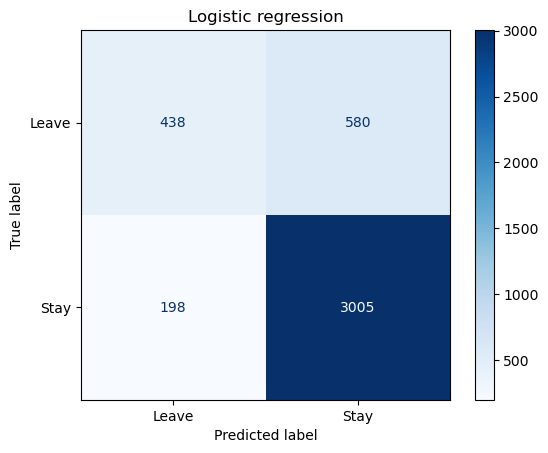

In [99]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_sfs, cmap="Blues", display_labels=["Leave", "Stay"])
plt.title("Logistic regression")

Text(0.5, 1.0, 'Logistic regression (normalized)')

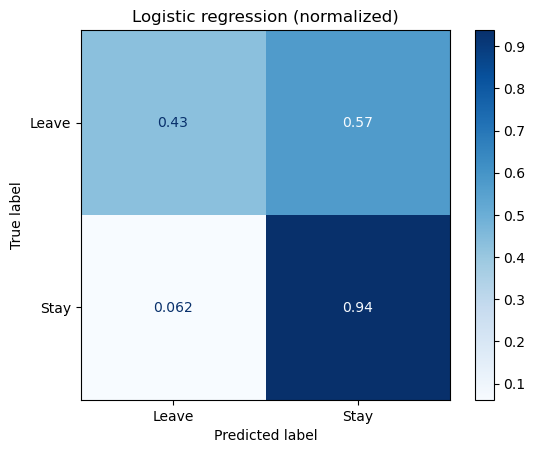

In [100]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_sfs, cmap="Blues", normalize="true", display_labels=["Leave", "Stay"])
plt.title("Logistic regression (normalized)")

In [101]:
model_tree = DecisionTreeClassifier(random_state=1234, max_depth=4, min_samples_leaf=3)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, random_state=1234)

In [102]:
y_pred_tree = model_tree.predict(X_test)

In [103]:
y_pred_tree_prob = model_tree.predict_proba(X_test)[:, 1] 

In [104]:
accuracy_score(y_test, y_pred_tree)

0.9547500592276712

Text(0.5, 1.0, 'Decision tree')

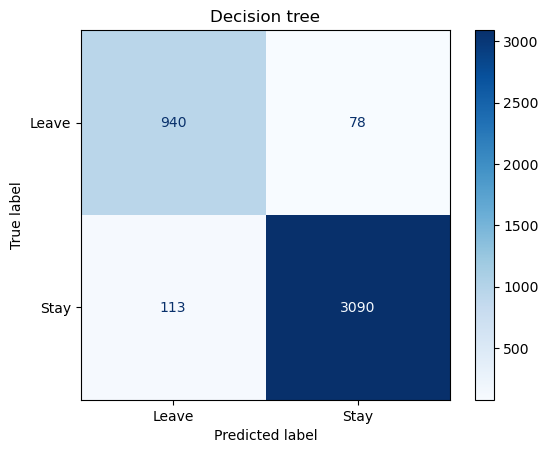

In [105]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree, cmap="Blues", display_labels=["Leave", "Stay"])
plt.title("Decision tree")

Text(0.5, 1.0, 'Decision tree (normalized)')

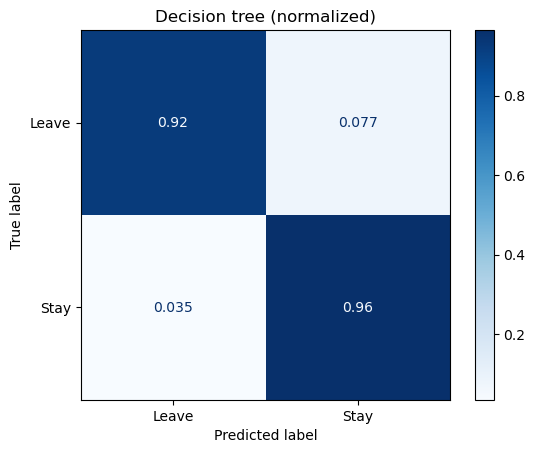

In [106]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree, cmap="Blues", normalize="true", display_labels=["Leave", "Stay"])
plt.title("Decision tree (normalized)")

In [107]:
column_names = X_train.columns

In [114]:
# Create DOT data
dot_data = tree.export_graphviz(model_tree, out_file=None, 
                                feature_names=column_names, 
                                class_names=["leave", "stay"], filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)

#Image(graph.create_png())

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [116]:
param_grid = {
    'n_estimators': [100,200,300],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None,10,25,50],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'random_state': [1234]
}

In [117]:
model_forest = RandomForestClassifier()
grid_search = GridSearchCV(model_forest, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
3240 fits failed out of a total of 9720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2111 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\ProgramData\anaconda3\Lib\site-pac

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 25, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'random_state': [1234]},
             scoring='accuracy')

In [118]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(best_model)

RandomForestClassifier(bootstrap=False, max_depth=25, random_state=1234)


In [119]:
y_pred_forest = best_model.predict(X_test)
y_pred_forest_prob = best_model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred_forest)

In [120]:
accuracy

0.9834162520729685

In [121]:
best_params

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100,
 'random_state': 1234}

In [ ]:
'''
{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100,
 'random_state': 1234}
'''

Text(0.5, 1.0, 'Random forests')

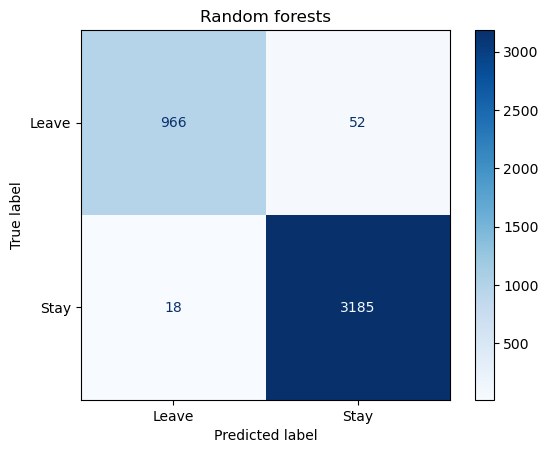

In [133]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_forest, cmap="Blues", display_labels=["Leave", "Stay"])
plt.title("Random forests")

Text(0.5, 1.0, 'Random forests (Normalized)')

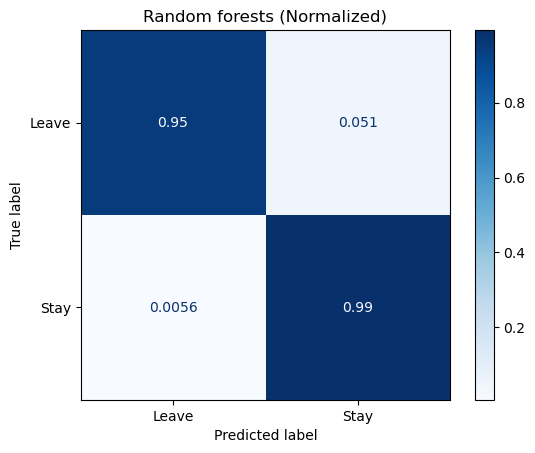

In [132]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_forest, cmap="Blues", normalize="true", display_labels=["Leave", "Stay"])
plt.title("Random forests (Normalized)")

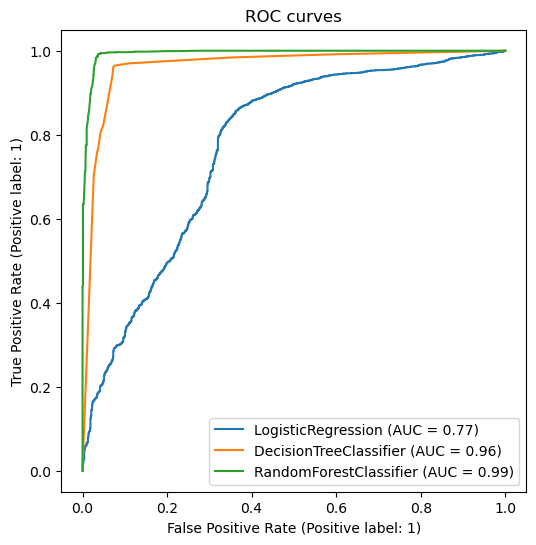

In [124]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.set_title("ROC curves")
RocCurveDisplay.from_estimator(lr_sfs, X_test_sfs, y_test,ax=ax)
RocCurveDisplay.from_estimator(model_tree, X_test, y_test,ax=ax)
RocCurveDisplay.from_estimator(best_model, X_test, y_test,ax=ax)

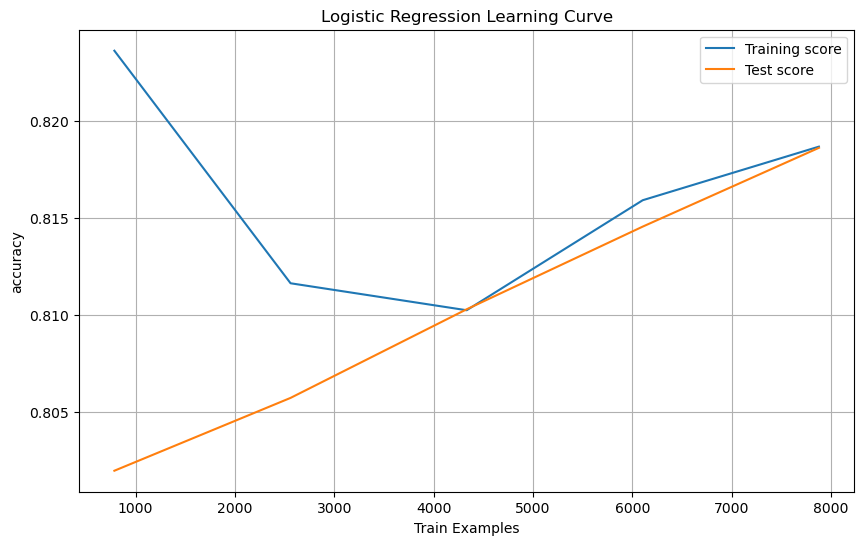

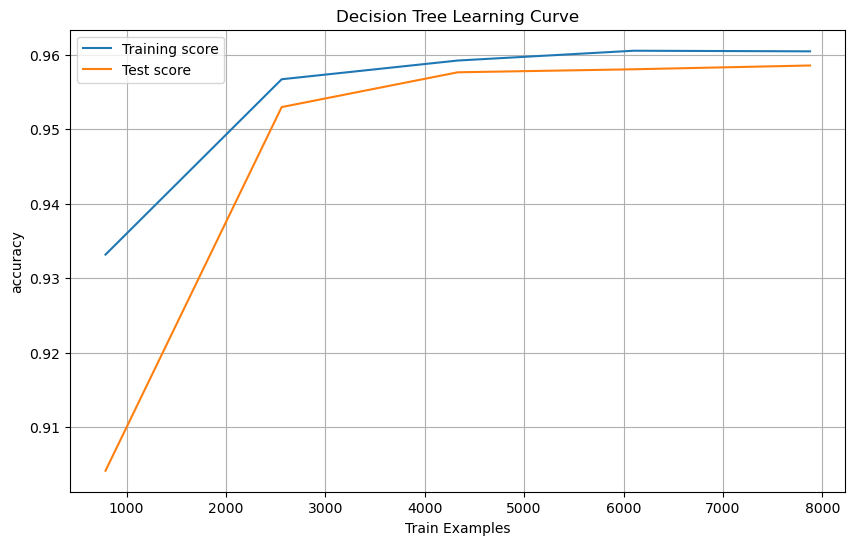

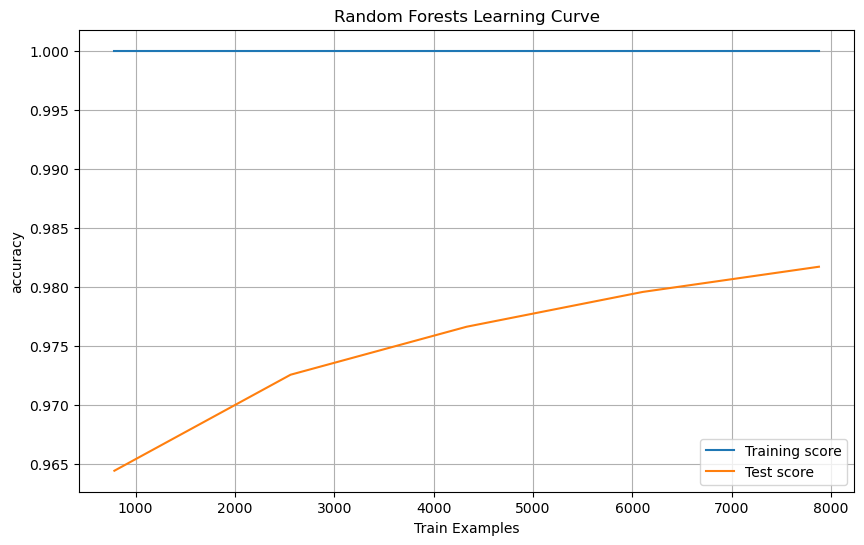

In [131]:
from sklearn.model_selection import learning_curve

def something(estimator, X, y, cv, title, train_sizes=np.linspace(.1,1.0,5)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring="accuracy"
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis = 1)

    plt.figure(figsize=(10,6))
    plt.title(title)
    plt.xlabel("Train Examples")
    plt.ylabel("accuracy")

    plt.plot(train_sizes, train_scores_mean, label="Training score")
    plt.plot(train_sizes, test_scores_mean, label="Test score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()
 
something(lr_sfs, X_train_sfs, y_train, cv=5, title="Logistic Regression Learning Curve")
something(model_tree, X_train, y_train, cv=5, title="Decision Tree Learning Curve")
something(best_model, X_train, y_train, cv=5, title="Random Forests Learning Curve")   


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv, title, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_losses, test_losses = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring="neg_mean_squared_error"
    )

    train_losses_mean = -np.mean(train_losses, axis=1)
    test_losses_mean = -np.mean(test_losses, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Number of Training Samples")
    plt.ylabel("Loss (MSE)")

    plt.plot(train_sizes, train_losses_mean, label="Training loss")
    plt.plot(train_sizes, test_losses_mean, label="Validation loss")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

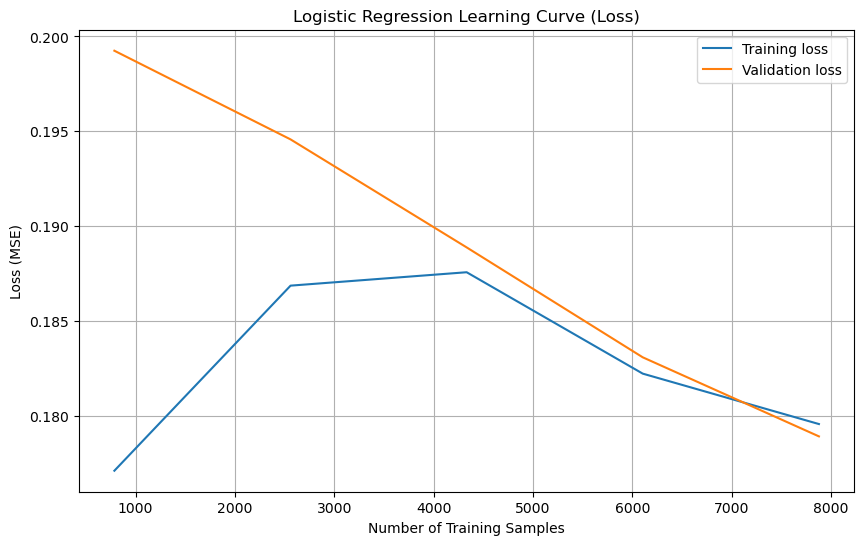

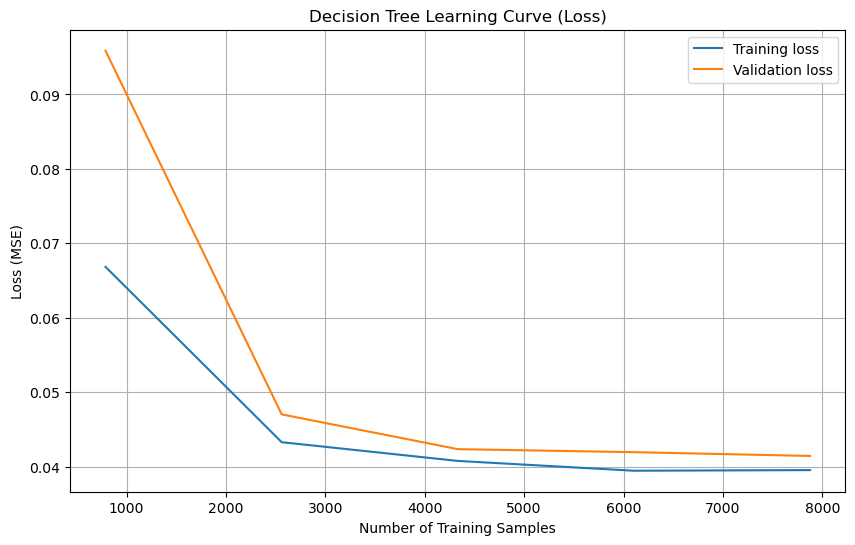

In [46]:

plot_learning_curve(lr_sfs, X_train_sfs, y_train, cv=5, title="Logistic Regression Learning Curve (Loss)")
plot_learning_curve(model_tree, X_train, y_train, cv=5, title="Decision Tree Learning Curve (Loss)")